In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

from EM import ExpectationMaximation
from EM_extended import ExpectationMaximation_extended
from NB import NaiveBayes

In [2]:
#creates a dirctionary with the accuracies and log model probabilities of the em algorithm for the different numbers of labeled data specified in labeled_train_sizes
def test_em(X_labeled, y_labeled, X_unlabeled, X_test, y_test, labeled_train_sizes, print_accuracy=False):
    em_test_scores = dict()
    em_test_scores['accuracy']=list()
    em_test_scores['log_model_prob']=list()
    em_test_scores['labeled_train_sizes'] = list()
    for labeled_train_size in labeled_train_sizes:
        if (labeled_train_size>X_labeled.shape[0]):
            print("labeled_train_size ", labeled_train_size, " too large; not enough labeled data!")
            continue
        em = ExpectationMaximation()
        em.fit(X_labeled[:labeled_train_size,], y_labeled[:labeled_train_size], X_unlabeled)
        y_pred = em.predict(X_test)
        accuracy = accuracy_score(y_test,y_pred)
        em_test_scores['accuracy'].append(accuracy)
        if (print_accuracy):
            print (labeled_train_size, "labeled datasets:")
            print ("Accuracy:", accuracy)
        em_test_scores['log_model_prob'].append(em.log_model_prob)
        em_test_scores['labeled_train_sizes'].append(labeled_train_size)
    return em_test_scores

In [4]:
#creates a dirctionary with the accuracies and log model probabilities of naive bayes for the different numbers of labeled data specified in labeled_train_sizes
def test_nb(X_labeled, y_labeled, X_test, y_test, labeled_train_sizes, print_accuracy=False):
    nb_test_scores = dict()
    nb_test_scores['accuracy']=list()
    nb_test_scores['log_model_prob']=list()
    nb_test_scores['labeled_train_sizes'] = list()
    for labeled_train_size in labeled_train_sizes:
        if (labeled_train_size>X_labeled.shape[0]):
            print("labeled_train_size ", labeled_train_size, " too large; not enough labeled data!")
            continue
        nb = NaiveBayes()
        nb.fit(X_labeled[:labeled_train_size,], y_labeled[:labeled_train_size])
        y_pred = nb.predict(X_test)
        accuracy = accuracy_score(y_test,y_pred)
        nb_test_scores['accuracy'].append(accuracy)
        if (print_accuracy):
            print (labeled_train_size, "labeled datasets:")
            print ("Accuracy:", accuracy)
        nb_test_scores['log_model_prob'].append(em.log_model_prob)
        nb_test_scores['labeled_train_sizes'].append(labeled_train_size)
    return nb_test_scores

In [6]:
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'), shuffle=False)
X_train_text, X_test_text, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, stratify=data.target)

In [7]:
# Transformtext data into vectors 
vectorizer = TfidfVectorizer(stop_words=['english'], min_df=5, max_df=0.95)

X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

In [8]:
# Divide train data set into labeled and unlabeled data sets
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X_train, y_train, test_size=10000, stratify=y_train)
experiments = np.logspace(2.3, 3.7, num=20, base=10, dtype='int')

In [9]:
# test of my own em classifier
from sklearn.metrics import accuracy_score
from EM import ExpectationMaximation

em = ExpectationMaximation()
em.fit(X_labeled[:1000,], y_labeled[:1000], X_unlabeled)
print(accuracy_score(y_test,em.predict(X_test)))

0.6517241379310345


In [10]:
labeled_train_sizes = range(200,5000,200)
em_test_scores = test_em(X_labeled, y_labeled, X_unlabeled, X_test, y_test, labeled_train_sizes, print_accuracy=True)

200 labeled datasets:
Accuracy: 0.5175066312997347
400 labeled datasets:
Accuracy: 0.5721485411140583
600 labeled datasets:
Accuracy: 0.6159151193633953
800 labeled datasets:
Accuracy: 0.650132625994695
1000 labeled datasets:
Accuracy: 0.6517241379310345
1200 labeled datasets:
Accuracy: 0.6612732095490716
1400 labeled datasets:
Accuracy: 0.6641909814323608
1600 labeled datasets:
Accuracy: 0.6681697612732096
1800 labeled datasets:
Accuracy: 0.6753315649867374
2000 labeled datasets:
Accuracy: 0.6838196286472149
2200 labeled datasets:
Accuracy: 0.6851458885941645
2400 labeled datasets:
Accuracy: 0.6870026525198939
2600 labeled datasets:
Accuracy: 0.6888594164456233
2800 labeled datasets:
Accuracy: 0.6941644562334217
3000 labeled datasets:
Accuracy: 0.6936339522546419
3200 labeled datasets:
Accuracy: 0.696551724137931
3400 labeled datasets:
Accuracy: 0.6986737400530504
3600 labeled datasets:
Accuracy: 0.7
3800 labeled datasets:
Accuracy: 0.7018567639257295
4000 labeled datasets:
Accuracy: 

In [12]:
nb_test_scores = test_nb(X_labeled, y_labeled, X_test, y_test, labeled_train_sizes, print_accuracy=True)

200 labeled datasets:
Accuracy: 0.3159151193633952
400 labeled datasets:
Accuracy: 0.42201591511936337
600 labeled datasets:
Accuracy: 0.5050397877984085
800 labeled datasets:
Accuracy: 0.5517241379310345
1000 labeled datasets:
Accuracy: 0.5668435013262599
1200 labeled datasets:
Accuracy: 0.5944297082228117
1400 labeled datasets:
Accuracy: 0.6175066312997347
1600 labeled datasets:
Accuracy: 0.6249336870026525
1800 labeled datasets:
Accuracy: 0.6419098143236074
2000 labeled datasets:
Accuracy: 0.6538461538461539
2200 labeled datasets:
Accuracy: 0.6575596816976127
2400 labeled datasets:
Accuracy: 0.6633952254641909
2600 labeled datasets:
Accuracy: 0.6676392572944297
2800 labeled datasets:
Accuracy: 0.6702917771883289
3000 labeled datasets:
Accuracy: 0.6787798408488064
3200 labeled datasets:
Accuracy: 0.6824933687002652
3400 labeled datasets:
Accuracy: 0.6840848806366048
3600 labeled datasets:
Accuracy: 0.6920424403183024
3800 labeled datasets:
Accuracy: 0.6915119363395226
4000 labeled da

Text(0.5, 1.0, 'Test Accuracy vs Number of Labeled Documents in Training Set')

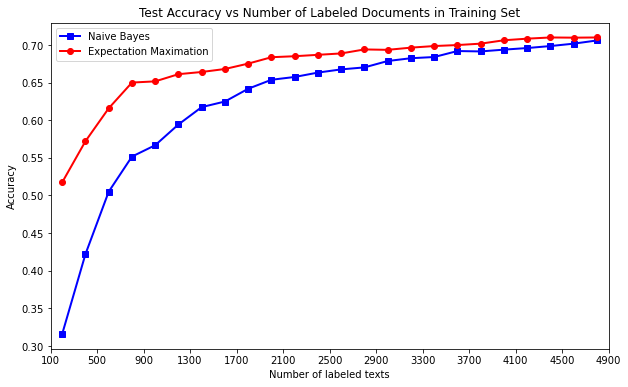

In [14]:
#plotting accuracy against number of labeled documents
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(nb_test_scores['labeled_train_sizes'], nb_test_scores['accuracy'], color='b', marker='s', linewidth=2, label='Naive Bayes')
ax.plot(em_test_scores['labeled_train_sizes'], em_test_scores['accuracy'], color='r', marker='o', linewidth=2, label='Expectation Maximation')
ax.set_xlabel('Number of labeled texts')
ax.set_ylabel('Accuracy')
ax.set_xlim(left=np.min(nb_test_scores['labeled_train_sizes']+em_test_scores['labeled_train_sizes'])-50,
            right=np.max(nb_test_scores['labeled_train_sizes']+em_test_scores['labeled_train_sizes'])+50)
ax.set_xticks(range(100,5000,400))
plt.legend(loc='upper left')
plt.title('Test Accuracy vs Number of Labeled Documents in Training Set')

In [15]:
#calculating model probability and accuracy for each iteration of the em-algorithm for 10 randomly chosen sets of labeled texts
labeled_train_size = 1000
em_scores = dict()
em_scores['log_model_prob'] = list()
em_scores['accuracy'] = list()
for random_seed in range(1,10):
    X_labeled_1, _, y_labeled_1, _ = train_test_split(X_labeled, y_labeled, random_state=random_seed, train_size=labeled_train_size)
    for n_iter in range(11):
        em = ExpectationMaximation(max_iter=n_iter, tol=0)
        em.fit(X_labeled_1, y_labeled_1, X_unlabeled)
        y_pred = em.predict(X_test)
        accuracy = accuracy_score(y_test,y_pred)
        em_scores['accuracy'].append(accuracy)
        em_scores['log_model_prob'].append(em.log_model_prob)

Text(0.5, 1.0, 'Test Accuracy vs Logarithmic Model Probability')

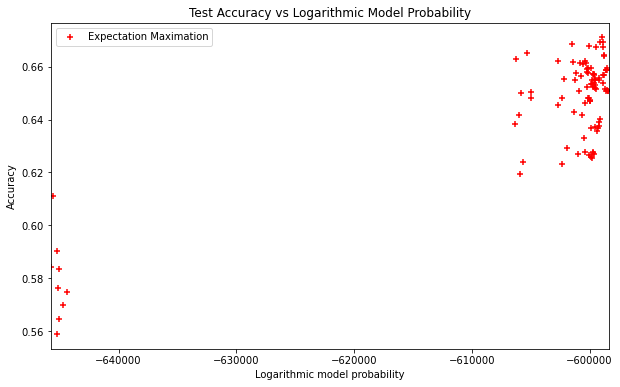

In [18]:
#plotting model probability against accuracy
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.scatter(em_scores['log_model_prob'], em_scores['accuracy'], color='r', marker='+', label='Expectation Maximation')
ax.set_xlabel('Logarithmic model probability')
ax.set_ylabel('Accuracy')
ax.set_xlim(left=np.min(em_scores['log_model_prob'])-50,
            right=np.max(em_scores['log_model_prob'])+50)
plt.legend(loc='upper left')
plt.title('Test Accuracy vs Logarithmic Model Probability')